# 对方科目分析

In [124]:
# 定义Excel文件路径
file = r"数据.xlsx"
# 读取Excel文件中的"序时账"工作表到DataFrame
df = pd.read_excel(file, sheet_name='序时账')
# 显示DataFrame内容
df

,日期,凭证号,科目编号,科目名称,借,贷
0,2020-01-13,10001,100202,银行存款-结算户,99904.00,0.00
1,2020-01-13,10001,112202,应收账款-企业外部,0.00,99904.00
2,2020-01-15,20001,660304,财务费用-金融业务手续费,1380.50,0.00
3,2020-01-15,20001,100202,银行存款-结算户,0.00,1380.50
4,2020-01-16,20002,660304,财务费用-金融业务手续费,200.00,0.00
...,...,...,...,...,...,...
4890,2020-12-31,30091,410401,利润分配-未分配利润,0.00,299184.82
4891,2020-12-31,30092,410402,利润分配-提取法定盈余公积,50049.00,0.00
4892,2020-12-31,30092,410101,盈余公积-法定盈余公积,0.00,50049.00
4893,2020-12-31,30093,410402,利润分配-提取法定盈余公积,0.00,50049.00


In [130]:
# 将科目名称通过-分列，取第一个值作为新列“一级科目”
df['一级科目'] = df['科目名称'].str.split('-').str[0]
df

,日期,凭证号,科目编号,科目名称,借,贷,一级科目
0,2020-01-13,10001,100202,银行存款-结算户,99904.00,0.00,银行存款
1,2020-01-13,10001,112202,应收账款-企业外部,0.00,99904.00,应收账款
2,2020-01-15,20001,660304,财务费用-金融业务手续费,1380.50,0.00,财务费用
3,2020-01-15,20001,100202,银行存款-结算户,0.00,1380.50,银行存款
4,2020-01-16,20002,660304,财务费用-金融业务手续费,200.00,0.00,财务费用
...,...,...,...,...,...,...,...
4890,2020-12-31,30091,410401,利润分配-未分配利润,0.00,299184.82,利润分配
4891,2020-12-31,30092,410402,利润分配-提取法定盈余公积,50049.00,0.00,利润分配
4892,2020-12-31,30092,410101,盈余公积-法定盈余公积,0.00,50049.00,盈余公积
4893,2020-12-31,30093,410402,利润分配-提取法定盈余公积,0.00,50049.00,利润分配


In [132]:
# 将日期和凭证号两列拼接成新列 "日期凭证号"
df['日期凭证号'] = df['日期'].dt.strftime('%Y-%m-%d') + df['凭证号'].astype(str)
df

,日期,凭证号,科目编号,科目名称,借,贷,一级科目,日期凭证号
0,2020-01-13,10001,100202,银行存款-结算户,99904.00,0.00,银行存款,2020-01-1310001
1,2020-01-13,10001,112202,应收账款-企业外部,0.00,99904.00,应收账款,2020-01-1310001
2,2020-01-15,20001,660304,财务费用-金融业务手续费,1380.50,0.00,财务费用,2020-01-1520001
3,2020-01-15,20001,100202,银行存款-结算户,0.00,1380.50,银行存款,2020-01-1520001
4,2020-01-16,20002,660304,财务费用-金融业务手续费,200.00,0.00,财务费用,2020-01-1620002
...,...,...,...,...,...,...,...,...
4890,2020-12-31,30091,410401,利润分配-未分配利润,0.00,299184.82,利润分配,2020-12-3130091
4891,2020-12-31,30092,410402,利润分配-提取法定盈余公积,50049.00,0.00,利润分配,2020-12-3130092
4892,2020-12-31,30092,410101,盈余公积-法定盈余公积,0.00,50049.00,盈余公积,2020-12-3130092
4893,2020-12-31,30093,410402,利润分配-提取法定盈余公积,0.00,50049.00,利润分配,2020-12-3130093


In [134]:
# & ((df['借']>0) | (df['借']<0))   & ((df['贷']>0) | (df['贷']<0))
# 定义要分析的科目名称
value = "应交税费"

# 筛选出与 "应交税费" 相关的所有凭证记录
# df['科目名称'].str.contains(value) 返回一个布尔序列,标识每行的科目名称是否包含"应交税费"
# df[...] 使用这个布尔序列筛选出所有相关记录
filtered_df = df[df['科目名称'].str.contains(value)]

# 使用筛选出的 "日期凭证号" 作为条件再次筛选数据
# filtered_df['日期凭证号'] 获取筛选结果中的所有日期凭证号
# df['日期凭证号'].isin(...) 返回一个布尔序列,标识每行的日期凭证号是否在筛选结果中
# df[...] 使用这个布尔序列获取所有相关的会计分录(包括对方科目)
relevant_records = df[df['日期凭证号'].isin(filtered_df['日期凭证号'])]

# 生成数据透视表
# pd.pivot_table 创建数据透视表
# values=['借', '贷'] 指定要汇总的数值列
# index=['科目名称'] 指定行索引
# aggfunc='sum' 指定汇总方式为求和
# 最终得到每个科目的借方和贷方发生额汇总
pivot_table = pd.pivot_table(relevant_records, values=['借', '贷'], index=['科目名称'], aggfunc='sum')
pivot_table

,借,贷
科目名称,,
其他业务成本-其他板块-内部-其他,2596392.95,0.00
其他业务成本-其他板块-外部-其他,6602003.57,0.00
其他业务收入-其他板块-内部-其他收入,0.00,10869767.78
其他业务收入-其他板块-外部-其他收入,0.00,20590072.33
其他应付款-其他-个人住房公积金,0.00,37470.00
其他应付款-其他-个人医疗保险费,0.00,5967.80
其他应付款-其他-个人基本养老保险费-省个人基本养老保险费,0.00,23878.20
其他应付款-其他-个人失业保险费,0.00,1490.29
合同负债-内部,12450.00,0.00


# 批量导出科目凭证

In [138]:
def opposite_interact(科目):
    """
    根据输入的科目名称，筛选出与该科目相关的所有凭证记录并导出到Excel文件
    
    参数:
    科目 (str): 要筛选的科目名称
    
    处理步骤:
    1. 筛选包含指定科目名称的所有记录
    2. 获取这些记录对应的日期凭证号
    3. 根据日期凭证号找出所有相关的会计分录
    4. 将结果导出到以科目名命名的Excel文件
    """
    
    # 使用str.contains()方法筛选出科目名称中包含指定科目的所有记录
    filtered_df = df[df['科目名称'].str.contains(科目)]
    
    # 使用isin()方法找出所有具有相同日期凭证号的记录
    # 这样可以获取到该科目所有相关的会计分录(包括对方科目)
    relevant_records = df[df['日期凭证号'].isin(filtered_df['日期凭证号'])]
    
    # 将筛选结果导出到Excel文件
    # 文件名为科目名称，不包含DataFrame的索引列
    relevant_records.to_excel(f'{科目}.xlsx', index=False)
    
    # 打印处理完成的提示信息
    print(f'{科目}---完成！')



# 打印开始处理的分隔线
print('-------------------------------- 开始处理 --------------------------------')

# 获取所有唯一的一级科目并循环处理
# df['一级科目'].unique()返回所有不重复的一级科目名称
for i in df['一级科目'].unique():
    # 对每个一级科目调用opposite_interact函数进行处理
    opposite_interact(i)

# 打印处理完成的分隔线
print('-------------------------------- 全部完成！ --------------------------------')

-------------------------------- 开始处理 --------------------------------
银行存款---完成！
应收账款---完成！
财务费用---完成！
应交税费---完成！
其他业务成本---完成！
应付账款---完成！
管理费用---完成！
其他业务收入---完成！
销售费用---完成！
其他应收款---完成！
应付职工薪酬---完成！
其他应付款---完成！
税金及附加---完成！
本年利润---完成！
营业外收入---完成！
预付账款---完成！
备用金---完成！
合同负债---完成！
资产减值损失---完成！
坏账准备---完成！
利润分配---完成！
盈余公积---完成！
-------------------------------- 全部完成！ --------------------------------


In [136]:
df['一级科目'].unique()

array(['银行存款', '应收账款', '财务费用', '应交税费', '其他业务成本', '应付账款', '管理费用', '其他业务收入',
       '销售费用', '其他应收款', '应付职工薪酬', '其他应付款', '税金及附加', '本年利润', '营业外收入',
       '预付账款', '备用金', '合同负债', '资产减值损失', '坏账准备', '利润分配', '盈余公积'],
      dtype=object)

# 数据整理

In [140]:
df = pd.read_excel(r'问题\数据分析底稿.xlsx', sheet_name=None)
df

{'Sheet1':     地区            业态  正常项目 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0    NaN             NaN  在建在售        NaN        NaN     待开发   
 1    NaN             NaN      面积       货量       利润       面积   
 2   小计             NaN        26         44         55         53   
 3   长沙             NaN        14         24         30         29   
 4   珠海             NaN        12         20         25         24   
 5   长沙            住宅         4          5          6          7   
 6    NaN            商铺         1          2          3          4   
 7    NaN            公寓         2          3          4          5   
 8    NaN          写字楼         3          4          5          6   
 9    NaN        配套物业         4          5          6          7   
 10   NaN  商业及其他小计        10         14         18         22   
 11   NaN            车位         4          5          6          7   
 12   NaN            小计        14         24         30         29   
 13  珠海            住宅         3      

In [142]:
正常在建 = df['正常项目-在建在售']
正常在建

,地区,业态,面积,货量,利润
0,长沙,住宅,4,5,6
1,NaN,商铺,1,2,3
2,NaN,公寓,2,3,4
3,NaN,写字楼,3,4,5
4,NaN,配套物业,4,5,6
5,NaN,车位,4,5,6
6,珠海,住宅,3,4,5
7,NaN,商铺,2,3,4
8,NaN,公寓,3,4,5
9,NaN,配套物业,4,5,6


In [150]:
# 空值填充为上一个非空值
# 正常在建.ffill(inplace=True)
正常在建.fillna(method='ffill', inplace=True)
正常在建['进展'] = '正常项目'
正常在建['状态'] = '在建在售'
正常在建

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24932\992439211.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,地区,业态,面积,货量,利润,进展,状态
0,长沙,住宅,4,5,6,正常项目,在建在售
1,长沙,商铺,1,2,3,正常项目,在建在售
2,长沙,公寓,2,3,4,正常项目,在建在售
3,长沙,写字楼,3,4,5,正常项目,在建在售
4,长沙,配套物业,4,5,6,正常项目,在建在售
5,长沙,车位,4,5,6,正常项目,在建在售
6,珠海,住宅,3,4,5,正常项目,在建在售
7,珠海,商铺,2,3,4,正常项目,在建在售
8,珠海,公寓,3,4,5,正常项目,在建在售
9,珠海,配套物业,4,5,6,正常项目,在建在售


In [152]:
正常待开发 = df['正常项目-待开发']

# 空值填充为上一个非空值
正常待开发.fillna(method='ffill', inplace=True)
正常待开发['进展'] = '正常项目'
正常待开发['状态'] = '待开发'
正常待开发

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24932\946502795.py:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,地区,业态,面积,货量,利润,进展,状态
0,长沙,住宅,7,8,9,正常项目,待开发
1,长沙,商铺,4,5,-6,正常项目,待开发
2,长沙,公寓,5,6,-5,正常项目,待开发
3,长沙,写字楼,6,7,-4,正常项目,待开发
4,长沙,配套物业,7,8,-3,正常项目,待开发
5,长沙,车位,7,8,9,正常项目,待开发
6,珠海,住宅,6,7,8,正常项目,待开发
7,珠海,商铺,5,6,-3,正常项目,待开发
8,珠海,公寓,6,7,-3,正常项目,待开发
9,珠海,配套物业,7,8,-3,正常项目,待开发


In [154]:
困难滞销 = df['困难项目-滞销']

# 空值填充为上一个非空值
困难滞销.fillna(method='ffill', inplace=True)
困难滞销['进展'] = '困难项目'
困难滞销['状态'] = '滞销'
困难滞销

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24932\3521006255.py:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,地区,业态,面积,货量,利润,进展,状态
0,长沙,住宅,4,5,6,困难项目,滞销
1,长沙,商铺,2,5,8,困难项目,滞销
2,长沙,公寓,3,6,9,困难项目,滞销
3,长沙,写字楼,3,6,9,困难项目,滞销
4,长沙,配套物业,5,8,11,困难项目,滞销
5,长沙,车位,4,5,6,困难项目,滞销
6,珠海,住宅,3,4,5,困难项目,滞销
7,珠海,商铺,3,6,9,困难项目,滞销
8,珠海,公寓,3,6,9,困难项目,滞销
9,珠海,配套物业,3,6,9,困难项目,滞销


In [156]:
困难缓建 = df['困难项目-缓建']

# 空值填充为上一个非空值
困难缓建.fillna(method='ffill', inplace=True)
困难缓建['进展'] = '困难项目'
困难缓建['状态'] = '缓建'
困难缓建

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24932\1875173271.py:4: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,地区,业态,面积,货量,利润,进展,状态
0,长沙,住宅,7,8,9,困难项目,缓建
1,长沙,商铺,11,14,17,困难项目,缓建
2,长沙,公寓,12,15,18,困难项目,缓建
3,长沙,写字楼,12,15,18,困难项目,缓建
4,长沙,配套物业,14,17,20,困难项目,缓建
5,长沙,车位,7,8,9,困难项目,缓建
6,珠海,住宅,6,7,8,困难项目,缓建
7,珠海,商铺,12,15,18,困难项目,缓建
8,珠海,公寓,12,15,18,困难项目,缓建
9,珠海,配套物业,12,15,18,困难项目,缓建


In [158]:
# 合并以上四个
df = pd.concat([正常在建, 正常待开发, 困难滞销, 困难缓建])
df

,地区,业态,面积,货量,利润,进展,状态
0,长沙,住宅,4,5,6,正常项目,在建在售
1,长沙,商铺,1,2,3,正常项目,在建在售
2,长沙,公寓,2,3,4,正常项目,在建在售
3,长沙,写字楼,3,4,5,正常项目,在建在售
4,长沙,配套物业,4,5,6,正常项目,在建在售
5,长沙,车位,4,5,6,正常项目,在建在售
6,珠海,住宅,3,4,5,正常项目,在建在售
7,珠海,商铺,2,3,4,正常项目,在建在售
8,珠海,公寓,3,4,5,正常项目,在建在售
9,珠海,配套物业,4,5,6,正常项目,在建在售


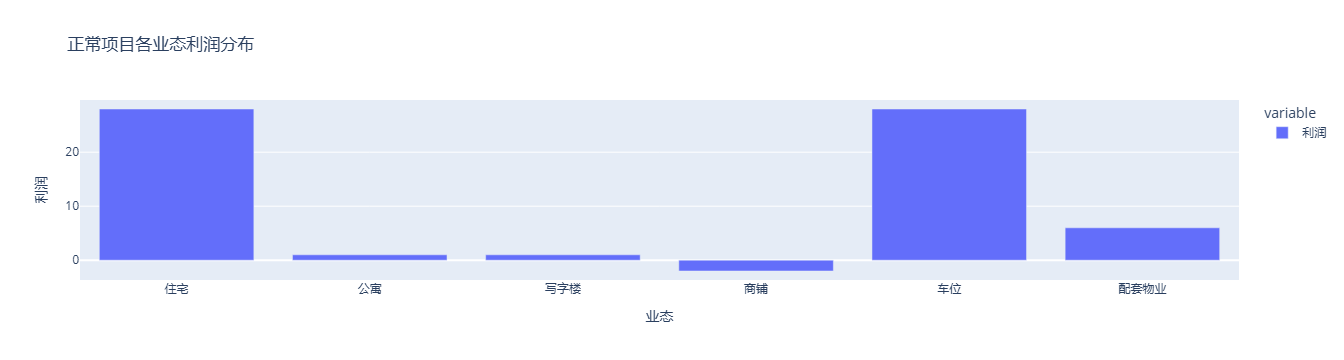

In [164]:
# 筛选正常项目
正常项目 = df[df['进展'] == '正常项目']

# 按业态分组计算利润总和
业态利润 = 正常项目.groupby('业态')['利润'].sum()

# 使用plotly绘制柱状图
import plotly.express as px

fig = px.bar(业态利润, 
             title='正常项目各业态利润分布',
             labels={'index': '业态', 'value': '利润'}
            )

fig.show()
